# Лаба 4

## Грузим и фильтруем данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml

In [2]:
config = yaml.load(
    open("config.yaml"),
    Loader=yaml.FullLoader
)

In [3]:
users_ds = pd.read_csv("data/user_data.csv")
users_ds.head(10)

,name,planning,watched,completed,days_watched,dropped,episodes_watched,mean_score,on_hold,plan_to_watch,rewatched,total_entries,watching,birthday,gender,joined,last_online,location,favorites,genre_count
0,-0,"[{'mal_id': 39764, 'title': 'Detective Conan M...","[{'title': '1', 'mal_id': 29978, 'score': 6, '...",467,181.6,0,11160,7.74,0,7,0,477,3,NaN,NaN,2017-09-19T00:00:00+00:00,2020-09-25 11:03:22+00:00,NaN,"{'anime': [], 'characters': [], 'people': []}","{'Action': 153, 'Adventure': 162, 'Cars': 5, '..."
1,-Droid-,"[{'mal_id': 6408, 'title': '""Bungaku Shoujo"" M...","[{'title': '11eyes', 'mal_id': 6682, 'score': ...",1125,263.3,4,16195,7.80,4,1131,53,2271,7,1930-01-07T00:00:00+00:00,Male,2013-09-07T00:00:00+00:00,2020-09-17 21:07:00+00:00,MA,"{'anime': [{'mal_id': 237, 'title': 'Koukyoush...","{'Action': 447, 'Adventure': 186, 'Cars': 1, '..."
2,-Hentai,"[{'mal_id': 39783, 'title': '5-toubun no Hanay...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",887,270.4,60,16189,7.36,9,88,8,1070,26,1991-11-05T00:00:00+00:00,Male,2014-05-19T00:00:00+00:00,2020-09-21 19:11:28+00:00,UAE - Sharjah,"{'anime': [{'mal_id': 31933, 'title': 'JoJo no...","{'Action': 418, 'Adventure': 210, 'Cars': 1, '..."
3,-Jens,"[{'mal_id': 31646, 'title': '3-gatsu no Lion'}...","[{'title': '07-Ghost', 'mal_id': 5525, 'score'...",102,17.8,0,1093,6.81,8,403,0,518,5,NaN,NaN,2020-06-11T00:00:00+00:00,2020-09-24 14:06:00+00:00,Fish tank. I'm stuck.,"{'anime': [{'mal_id': 205, 'title': 'Samurai C...","{'Action': 36, 'Adventure': 9, 'Cars': 0, 'Com..."
4,-Kano,"[{'mal_id': 34777, 'title': '91 Days: Toki no ...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",193,65.2,25,3961,6.92,32,70,2,325,5,NaN,NaN,2015-08-12T00:00:00+00:00,2020-09-26 01:29:32+00:00,NaN,"{'anime': [], 'characters': [], 'people': []}","{'Action': 84, 'Adventure': 25, 'Cars': 0, 'Co..."
5,-Kurosawa-,"[{'mal_id': 38749, 'title': 'Blade Runner: Bla...","[{'title': '""0""', 'mal_id': 20707, 'score': 0,...",594,201.2,12,12248,5.42,5,13,34,651,27,2000-05-05T00:00:00+00:00,Male,2016-12-11T00:00:00+00:00,2020-09-20 12:52:00+00:00,Wired,"{'anime': [], 'characters': [], 'people': []}","{'Action': 301, 'Adventure': 152, 'Cars': 3, '..."
6,-Lethargica-,"[{'mal_id': 6408, 'title': '""Bungaku Shoujo"" M...","[{'title': '00:08', 'mal_id': 28761, 'score': ...",433,51.8,0,3252,5.36,3,666,0,1113,11,1995-03-21T00:00:00+00:00,Female,2017-05-30T00:00:00+00:00,2020-09-25 13:39:32+00:00,NaN,"{'anime': [{'mal_id': 339, 'title': 'Serial Ex...","{'Action': 81, 'Adventure': 64, 'Cars': 0, 'Co..."
7,-Mahiru-,"[{'mal_id': 19429, 'title': 'Akuma no Riddle'}...",[{'title': '30-pun de Wakaru! Kore made no Lov...,227,44.7,9,2799,7.96,3,81,11,325,5,2003-02-04T00:00:00+00:00,Female,2017-06-15T00:00:00+00:00,2020-09-25 20:23:22+00:00,Hanazono Land,"{'anime': [{'mal_id': 9253, 'title': 'Steins;G...","{'Action': 56, 'Adventure': 20, 'Cars': 0, 'Co..."
8,-Neko,"[{'mal_id': 34437, 'title': 'Code Geass: Fukka...","[{'title': '07-Ghost', 'mal_id': 5525, 'score'...",430,113.8,11,6763,7.68,0,16,0,556,99,1930-02-16T00:00:00+00:00,Non-Binary,2016-06-01T00:00:00+00:00,2020-09-20 18:20:00+00:00,Antarctica,"{'anime': [], 'characters': [], 'people': []}","{'Action': 200, 'Adventure': 49, 'Cars': 0, 'C..."
9,-Ryu,"[{'mal_id': 40148, 'title': '22/7'}, {'mal_id'...","[{'title': '.hack//Sign', 'mal_id': 48, 'score...",700,226.3,86,13319,5.48,7,157,60,954,4,1993-11-18T00:00:00+00:00,Male,2016-08-22T00:00:00+00:00,2020-09-26 04:07:30+00:00,Sua casa,"{'anime': [{'mal_id': 5114, 'title': 'Fullmeta...","{'Action': 296, 'Adventure': 179, 'Cars': 0, '..."


## Будем предсказывать, какие оценки будет ставить юзер по времени, потраченному на аниме

In [4]:
interesting_columns = [
    "total_entries",
    "days_watched",
    "completed",
    "episodes_watched",

    "mean_score",
]
users_ds = users_ds[interesting_columns]
users_ds = users_ds[users_ds["total_entries"] > 10]

`mean_score` округлим, сузим шкалу до 5-ти

In [5]:
users_ds["mean_score_adj"] = (users_ds["mean_score"].round() / 2).astype("int")

interesting_columns[-1] = "mean_score_adj"
users_ds = users_ds[interesting_columns]

users_ds.info()
users_ds.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2193 entries, 0 to 2194
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_entries     2193 non-null   int64  
 1   days_watched      2193 non-null   float64
 2   completed         2193 non-null   int64  
 3   episodes_watched  2193 non-null   int64  
 4   mean_score_adj    2193 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 102.8 KB


,total_entries,days_watched,completed,episodes_watched,mean_score_adj
0,477,181.6,467,11160,4
1,2271,263.3,1125,16195,4
2,1070,270.4,887,16189,3
3,518,17.8,102,1093,3
4,325,65.2,193,3961,3
5,651,201.2,594,12248,2
6,1113,51.8,433,3252,2
7,325,44.7,227,2799,4
8,556,113.8,430,6763,4
9,954,226.3,700,13319,2


In [6]:
X = users_ds[interesting_columns[:-1]]
y = users_ds[interesting_columns[-1]].to_frame()

In [7]:
import scipy.stats as stats
import numpy as np

## Оценим параметры

In [8]:
alpha = config["alpha"]
print("alpha: ", alpha)

seed = config["seed"]
sample_size = config["sample_size"]

def calc_p_value(sample):
    _, p_value = stats.normaltest(sample)
    return p_value

for col in X:
    sample = X[col].sample(sample_size, random_state=seed)
    p_value = calc_p_value(sample)
    print(col)
    print("  p-value: ", p_value)
    if p_value < alpha:
        if sample.min() == 0:
            print("  can't calculate log p-value")
        else:
            p_value = calc_p_value(np.log(sample))
            print("  log p-value: ", p_value)

alpha:  0.05
total_entries
  p-value:  1.7781986298150652e-18
  log p-value:  0.0992770413413562
days_watched
  p-value:  1.3402430822070417e-21
  log p-value:  0.15214915958325062
completed
  p-value:  1.8350877483564654e-29
  log p-value:  0.22440328126484899
episodes_watched
  p-value:  2.1676946676653409e-26
  log p-value:  0.11656532430563682


## Посмотрим на неравномерность распределения признака

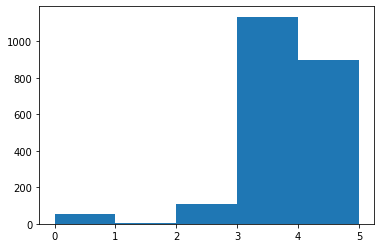

In [9]:
plt.hist(y, bins=5)
plt.show()

## В ход идёт fit-predict

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
test_part = config["test_part"]
beta = config["f_beta"]

X = X.values
y = y.values.reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    shuffle=True,
    stratify=y,
    random_state=seed,
    test_size=test_part)

def measure_and_print(meas_name, meas_fun, pred, beta = None):
    if beta != None:
        meas = meas_fun(y_true=y_test, y_pred=pred, average="weighted", zero_division=1, beta=beta)
    else:
        meas = meas_fun(y_true=y_test, y_pred=pred, average="weighted", zero_division=1)
    print("  {}: {}".format(meas_name, meas))

def fit_and_measure(name, model):
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    measure_and_print("precision", metrics.precision_score, y_pred)
    measure_and_print("recall", metrics.recall_score, y_pred)
    measure_and_print("f1", metrics.f1_score, y_pred)
    measure_and_print("fbeta", metrics.fbeta_score, y_pred, beta)

In [12]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [13]:
name_and_model = [
    ("SVC", SVC(random_state=seed)),
    ("KNeighborClassifier", KNeighborsClassifier()),
    ("RFC", RandomForestClassifier(random_state=seed))
]
for (name, model) in name_and_model:
    fit_and_measure(name, model)

SVC
  precision: 0.5325106953755365
  recall: 0.5239179954441914
  f1: 0.4716553075693296
  fbeta: 0.4844303535597602
KNeighborClassifier
  precision: 0.49849619427872144
  recall: 0.510250569476082
  f1: 0.48724225007698935
  fbeta: 0.47804408984283725
RFC
  precision: 0.4772998923554681
  recall: 0.510250569476082
  f1: 0.4859075313011797
  fbeta: 0.4750671864285763
